# Laboration deep learning

## 0. EDA och filhantering

### a)

### b)

In [306]:
from pathlib import Path
import numpy as np
import os

current_path = Path().absolute()
print(f"{current_path = }")

current_path = WindowsPath('y:/Skola/OOP/Skolarbete/AI-Erik-Johansson-OPA23/lab2')


In [307]:
import matplotlib.pyplot as plt

data_path = current_path / "original_data" / "train" / "train"

image_paths = [f for f in os.listdir(data_path)]

# https://stackoverflow.com/questions/49280966/pulling-random-files-out-of-a-folder-for-sampling

images_random = [(plt.imread(data_path / i), i) for i in (np.random.choice(image_paths, 10))]

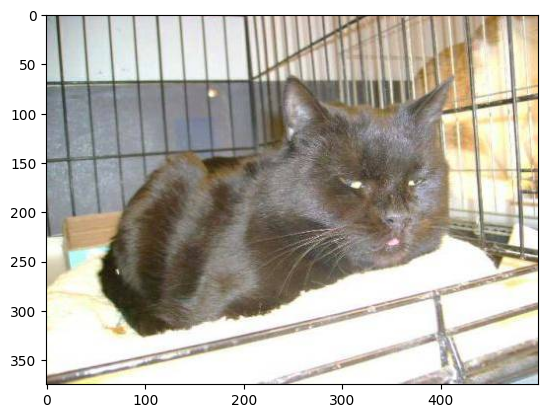

In [308]:
plt.imshow(images_random[0][0])

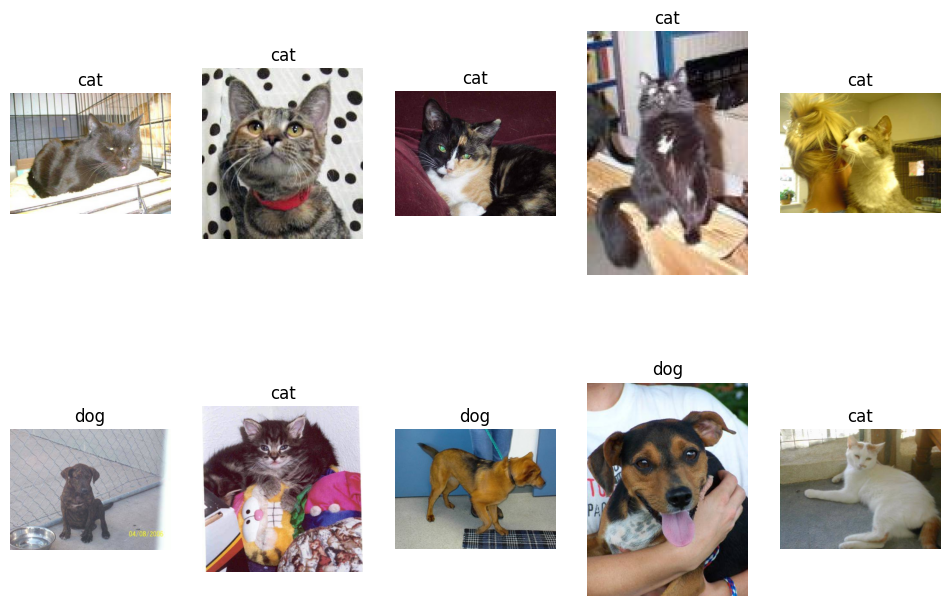

In [309]:
import matplotlib.pyplot as plt

labels = ["dog", "cat"]

fig, axes = plt.subplots(2,5, figsize=(12,8))

for ax, image in zip(axes.flatten(), images_random):
    ax.imshow(image[0])
    # https://stackoverflow.com/questions/47684802/to-check-if-filename-has-substring-of-a-word-in-a-list
    for label in labels:
        if label in image[1]:
            ax.set_title(f"{label}")
    ax.axis("off")

### c)

In [310]:
for size in ("small", "tiny"):
    newdir = current_path / f"experiment_{size}_data"
    if not os.path.exists(newdir):
        os.makedirs(newdir)
    for split in ("test", "train", "val"):
        splitdir = newdir / split
        if not os.path.exists(splitdir):
            os.makedirs(splitdir)


### d)

In [311]:
cat_paths = [str(path) for path in data_path.glob("*.jpg")][:12500]
dog_paths = [str(path) for path in data_path.glob("*.jpg")][12500:]
cat_paths[12499], dog_paths[12499]

('y:\\Skola\\OOP\\Skolarbete\\AI-Erik-Johansson-OPA23\\lab2\\original_data\\train\\train\\cat.9999.jpg',
 'y:\\Skola\\OOP\\Skolarbete\\AI-Erik-Johansson-OPA23\\lab2\\original_data\\train\\train\\dog.9999.jpg')

In [312]:
cat_small = np.random.choice(cat_paths, 1250, replace=False)
dog_small = np.random.choice(dog_paths, 1250, replace=False)
len(cat_small), len(dog_small)

(1250, 1250)

In [313]:
len(cat_small)

1250

In [314]:
from itertools import islice
# https://www.geeksforgeeks.org/python-split-list-in-uneven-groups/
test_sizes = [250, 800, 200]

temp = iter(cat_small)
cat_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(cat_split[1])

800

In [315]:
temp = iter(dog_small)
dog_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(dog_split[2])

200

In [316]:
for cat in cat_split:
    print(len(cat))

250
800
200


In [317]:
import shutil
# https://stackoverflow.com/questions/123198/how-to-copy-files

dirs = ("test", "train", "val")
#for dir, splits in zip(dirs, cat_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)

#for dir, splits in zip(dirs, dog_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)
    

### e)

In [318]:
data_path = current_path / "experiment_small_data" / "test"
test_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.seed(42)
np.random.shuffle(test_paths)
len(test_paths)

500

In [319]:
data_path = current_path / "experiment_small_data" / "train"
train_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(train_paths)
len(train_paths)

1600

In [320]:
data_path = current_path / "experiment_small_data" / "val"
val_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(val_paths)
len(val_paths)

400

In [321]:
len(train_paths)

1600

In [322]:
y_test = np.array([int("dog" in path) for path in test_paths])
y_train = np.array([int("dog" in path) for path in train_paths])
y_val = np.array([int("dog" in path) for path in val_paths])
len(y_test), len(y_train), len(y_val)

(500, 1600, 400)

In [323]:
image_test = [plt.imread(path) for path in test_paths[:10]]
image_labels = y_test[:10]
len(image_test), len(image_labels)

(10, 10)

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

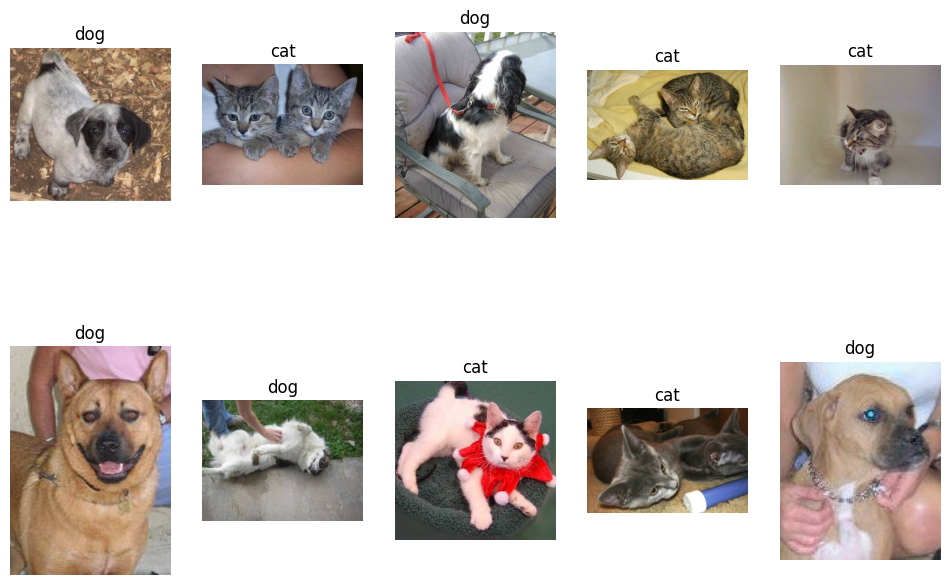

In [324]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(image_test[i])
    ax.axis("off")
    ax.set_title(labels[image_labels[i]])

fig.tight_layout

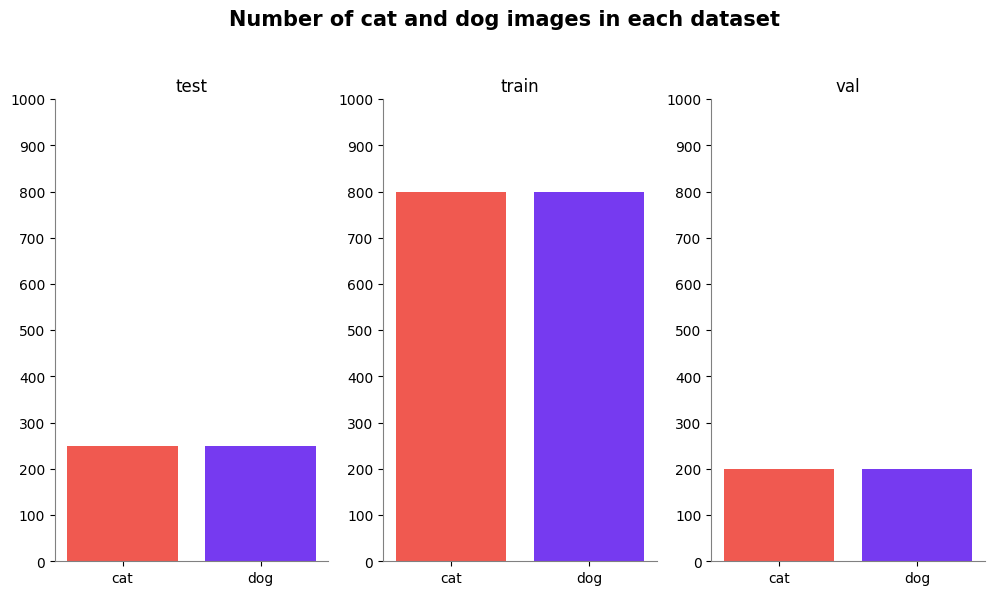

In [325]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for dir, ax in zip(dirs, axes):
    x = ["cat", "dog"]
    ax.set_title(dir)
    if dir == "test":
        y = [np.count_nonzero(y_test == i) for i in range(2)]
    elif dir == "train":
        y = [np.count_nonzero(y_train == i) for i in range(2)]
    elif dir == "val":
        y = [np.count_nonzero(y_val == i) for i in range(2)]
    ax.bar(x, y, color=["#F05950", "#763AF0"])
    ax.set_yticks(range(0, 1001, 100))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")

    fig.suptitle(
        "Number of cat and dog images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

In [326]:
y_train[:20]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

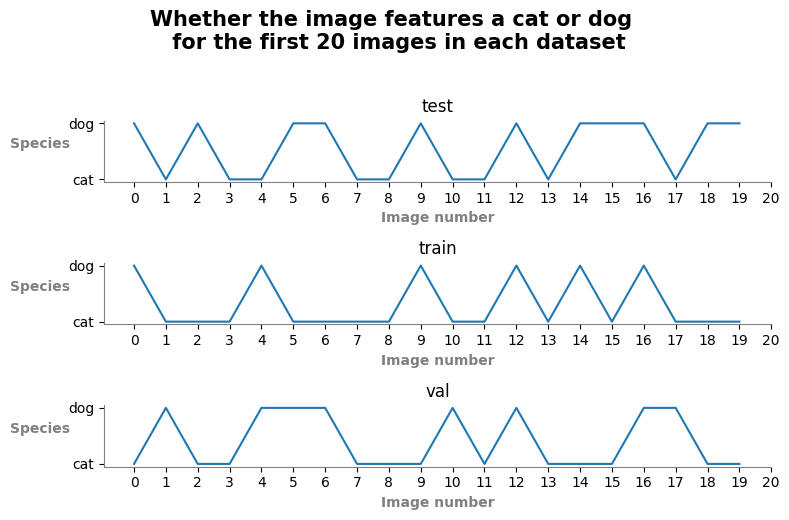

In [327]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(3, 1, figsize=(8, 5))
for dir, ax in zip(dirs, axes):
    x = range(20)
    ax.set_title(dir)
    if dir == "test":
        y = y_test[:20]
    elif dir == "train":
        y = y_train[:20]
    elif dir == "val":
        y = y_val[:20]
    ax.plot(x, y)
    ax.set_yticks(ticks=range(0, 2), labels=("cat", "dog"))
    ax.set_xticks(ticks=range(0, 21, 1))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")
    ax.set_xlabel("Image number", color="GRAY", fontweight="bold")
    ax.set_ylabel("Species", rotation=0, labelpad=20, color="GRAY", fontweight="bold")

    fig.suptitle(
        "Whether the image features a cat or dog \n for the first 20 images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

fig.tight_layout()

## 1. Bildbehandling

### a)

In [328]:
train_images = [plt.imread(path) for path in train_paths]
len(train_images)

1600

In [329]:
heights = [image.shape[0] for image in train_images]
widths = [image.shape[1] for image in train_images]
heights[:5], widths[:5]

([371, 253, 443, 256, 375], [447, 166, 500, 360, 499])

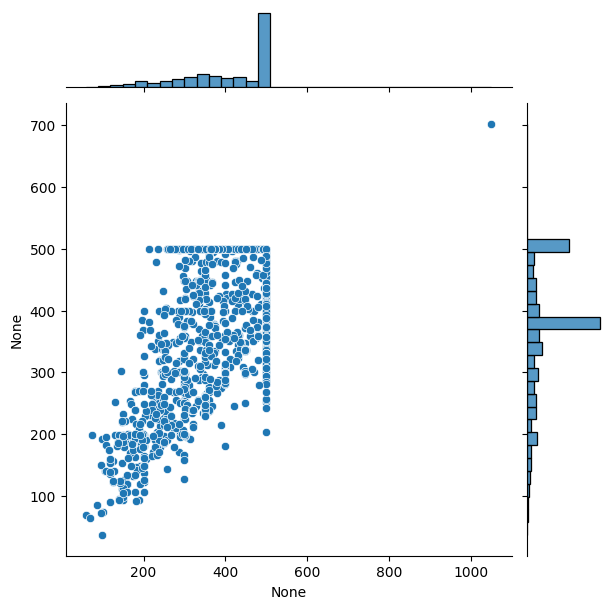

In [330]:
import seaborn as sns 

sns.jointplot(x=widths, y=heights)

### b)

Såg snabbt över bilderna och bytte manuellt ut ett par som inte föreställde varken en hund eller katt (dog.8898, dog.4367)

In [331]:
# Check how many images has a height and/or width that's smaller than 100px
res_too_small = []
for idx in range(0, len(heights)) :
    if heights[idx] < 150 or widths[idx] < 150:
        res_too_small.append(idx)

len(res_too_small), res_too_small[:5]

(74, [26, 30, 54, 137, 141])

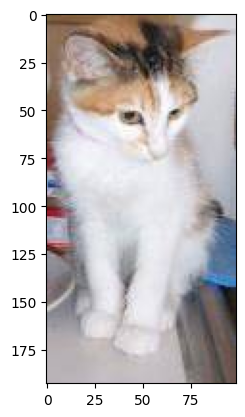

In [332]:
# Example image with subpar resolution
plt.imshow(train_images[141])

In [333]:
# Check how many images that has a height of 1.75 or more times its width and vice versa
res_bad_ratio = []
for idx in range(0, len(heights)) :
    if heights[idx] > 2*widths[idx] or widths[idx] > 1.5*heights[idx]:
        res_bad_ratio.append(idx)

len(res_bad_ratio), res_bad_ratio[:5]

(97, [17, 26, 29, 38, 43])

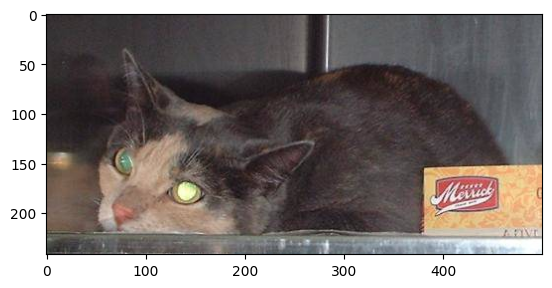

In [334]:
# Example image with subpar aspect ratio
plt.imshow(train_images[298])

In [335]:
# Check how many of the images are taller, wider or have the same ratio
taller, wider, same = 0, 0, 0
for idx in range(0, len(heights)) :
    if heights[idx] > widths[idx]:
        taller += 1
    elif widths[idx] > heights[idx]:
        wider += 1
    else:
        same +=1

taller, wider, same

(546, 1049, 5)

In [336]:
# Check average height and width
np.average(heights), np.average(widths)

(363.1575, 399.710625)

In [337]:
# Check most common height and width
for w in (heights, widths):
    unique, counts = np.unique(w, return_counts=True)
    print(unique[np.argmax(counts)])

374
499


###
En lämplig bildstorlek skulle kunna vara ca 400x450 eftersom det är runt den storleken de flesta bilderna är och att bilderna generellt är bredare så kan det vara värt att skeva hur de förvrängs mer åt det hållet. Jag tänker att bilder som har mindre upplösning än 100px i någon riktning kan slängas och att bilder som har för stor skillnad i höjd och bredd nog också kan vara värt att göra så med.

In [349]:
def get_desired_paths(dir, min_size, max_ratio):
    data_path = current_path / "experiment_small_data" / dir
    paths = [str(path) for path in data_path.glob("*.jpg")]
    np.random.seed(42)
    np.random.shuffle(paths)

    images = [plt.imread(path) for path in paths]
    heights = [image.shape[0] for image in images]
    widths = [image.shape[1] for image in images]

    res_too_small = []
    for idx in range(0, len(heights)):
        if heights[idx] < min_size or widths[idx] < min_size:
            res_too_small.append(idx)

    res_bad_ratio = []
    for idx in range(0, len(heights)):
        if (
            heights[idx] > max_ratio * widths[idx]
            or widths[idx] > max_ratio * heights[idx]
        ):
            res_bad_ratio.append(idx)

    subpar_images_idx = res_too_small + list(set(res_bad_ratio) - set(res_too_small))
    subpar_images_paths = [paths[idx] for idx in subpar_images_idx]
    new_paths = list(set(paths) - set(subpar_images_paths))

    y = np.array([int("dog" in path) for path in new_paths])

    return new_paths, y

In [350]:
pruned_test_paths, pruned_y_test = get_desired_paths("test", 150, 1.5)
len(pruned_test_paths), len(pruned_y_test)

(412, 412)

In [351]:

pruned_val_paths, pruned_y_val = get_desired_paths("val", 150, 1.5)
len(pruned_val_paths), len(pruned_y_val)

(344, 344)

In [352]:
pruned_train_paths, pruned_y_train = get_desired_paths("train", 150, 1.5)
len(pruned_train_paths), len(pruned_y_train)

(1379, 1379)

In [353]:
pruned_image_test = [plt.imread(path) for path in pruned_test_paths[:10]]
pruned_image_labels = pruned_y_test[:10]
len(pruned_image_test), len(pruned_image_labels)

(10, 10)

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

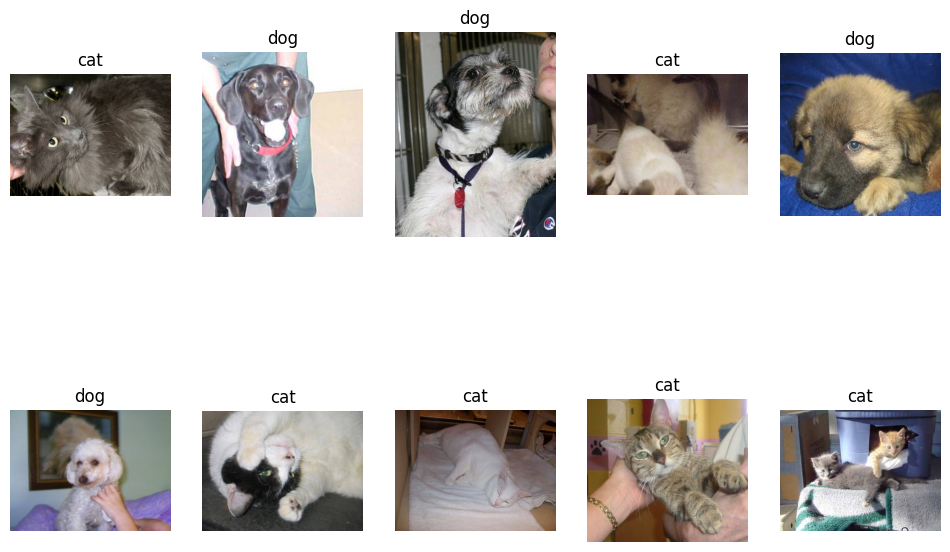

In [354]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(pruned_image_test[i])
    ax.axis("off")
    ax.set_title(labels[pruned_image_labels[i]])

fig.tight_layout

### c)

In [374]:
import cv2

def get_resized_images(data_path, width, height):
    images = [plt.imread(path) for path in data_path]
    resized_images = np.array([cv2.resize(image, (width, height)) for image in images])
    return resized_images

In [377]:
resized_test_images = get_resized_images(pruned_test_paths, 450, 400)
len(resized_test_images)

412

In [378]:
resized_train_images = get_resized_images(pruned_train_paths, 450, 400)
len(resized_train_images)

1379

In [379]:
resized_val_images = get_resized_images(pruned_val_paths, 450, 400)
len(resized_val_images)

344

In [359]:
resized_image_test = resized_test_images[:10]

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

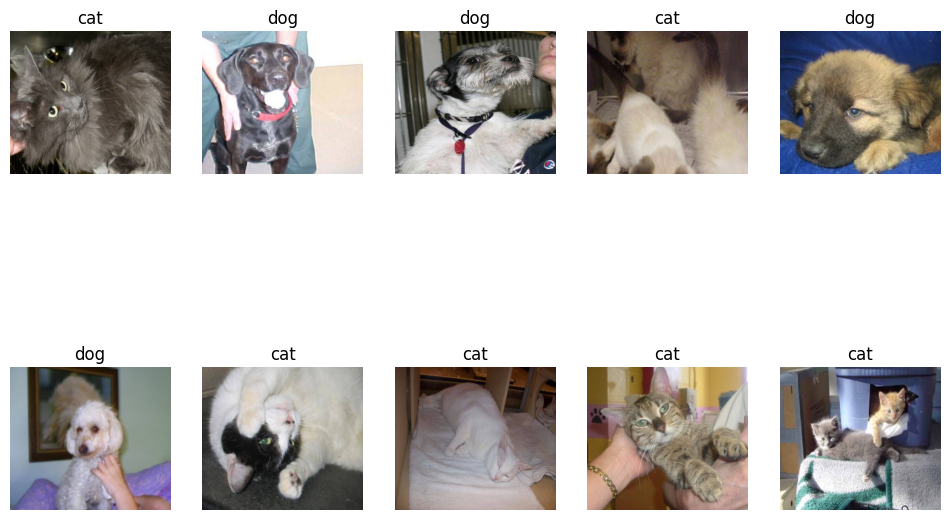

In [360]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(resized_image_test[i])
    ax.axis("off")
    ax.set_title(labels[pruned_image_labels[i]])

fig.tight_layout

## 2. Träna modeller

In [380]:
x_test = resized_test_images.astype("float32")/255
x_train = resized_train_images.astype("float32")/255
x_val = resized_val_images.astype("float32")/255
x_test.max(), x_test.min()

(1.0, 0.0)

In [387]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


def my_model(learning_rate=0.001, dropout_rate=0.5, kernels=[32, 64]):

    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    # convolutional and subsampling layers
    for kernel in kernels:
        conv_layer = Conv2D(
            kernel,  # number of kernels in each layer
            kernel_size=(3, 3),  # also (5,5), (7,7) available
            activation="relu",  # good starting point
            kernel_initializer="he_normal",  # initializing weights, good to use wit relu
            input_shape=x_train.shape[1:],  # 32x32x3
        )

        model.add(conv_layer)
        model.add(
            MaxPooling2D(pool_size=(2, 2), strides=2)
        )  # note these can also be tuned

    # MLP part
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
    model.add(
        Dense(1, activation="sigmoid")
    )  # softmax -> probabilities for each output

    model.compile(
        loss="binary_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = my_model(kernels=[32,64,128, 128])
model.summary()

y:\Skola\OOP\Skolarbete\AI-Erik-Johansson-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 398, 448, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 199, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 197, 222, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 98, 111, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 96, 109, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 48, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 46, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 23, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 76544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 76544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    39,191,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,432,385 (150.42 MB)

 Trainable params: 39,432,385 (150.42 MB)

 Non-trainable params: 0 (0.00 B)

In [388]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

y_train = pruned_y_train

model.fit(
    x_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_data=x_val
)

Epoch 1/100
25/44 ━━━━━━━━━━━━━━━━━━━━ 1:18 4s/step - acc: 0.4995 - loss: 5.6153

KeyboardInterrupt: 